<a href="https://colab.research.google.com/github/piyushdhurwey-unique/Image-classification-using-deep-learning/blob/main/Dogs_Vs_Cats_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download blancdmanignatblanc/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/blancdmanignatblanc/dogs-vs-cats
License(s): unknown
 97% 581M/599M [00:04<00:00, 161MB/s]
100% 599M/599M [00:04<00:00, 130MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
pip uninstall -y jax jaxlib


Found existing installation: jax 0.7.2
Uninstalling jax-0.7.2:
  Successfully uninstalled jax-0.7.2
Found existing installation: jaxlib 0.7.2
Uninstalling jaxlib-0.7.2:
  Successfully uninstalled jaxlib-0.7.2


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l2

In [6]:
# Generators
train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 23650 files belonging to 2 classes.
Found 3863 files belonging to 2 classes.


In [7]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [8]:
# Create CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=l2(0.001),input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',kernel_regularizer=l2(0.001),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',kernel_regularizer=l2(0.001),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 85s 95ms/step - accuracy: 0.5883 - loss: 3.1433 - val_accuracy: 0.7171 - val_loss: 1.1564
Epoch 2/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 68s 92ms/step - accuracy: 0.7252 - loss: 1.0111 - val_accuracy: 0.7406 - val_loss: 0.9698
Epoch 3/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7626 - loss: 0.8935 - val_accuracy: 0.7336 - val_loss: 0.8820
Epoch 4/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.7887 - loss: 0.8206 - val_accuracy: 0.8172 - val_loss: 0.7231
Epoch 5/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 62s 84ms/step - accuracy: 0.8168 - loss: 0.7481 - val_accuracy: 0.8250 - val_loss: 0.7671
Epoch 6/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 63s 84ms/step - accuracy: 0.8320 - loss: 0.8069 - val_accuracy: 0.6531 - val_loss: 1.3391
Epoch 7/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.8449 - loss: 0.8994 - val_accuracy: 0.7238 - val_loss: 1.3373
Epoch 8/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 62s 84ms/step - accuracy: 0.8618 - loss: 0.9011 - 

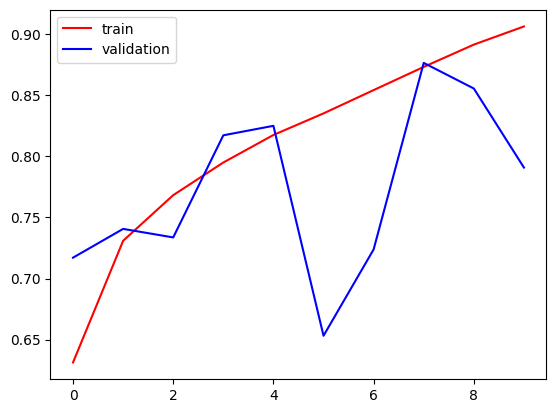

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

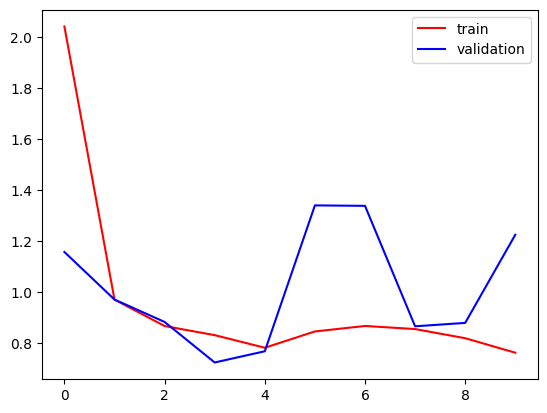

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import numpy as np

# Get one batch from validation dataset
for images, labels in validation_ds.take(1):
    img = images[0]        # first image in batch
    true_label = labels[0]

# Expand dims for model
img = np.expand_dims(img, axis=0)

# Prediction
prediction = model.predict(img)

# Output
print("Prediction probability:", prediction[0][0])

if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")

print("Actual label:", "Dog" if true_label.numpy() == 1 else "Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step
Prediction probability: 0.99979615
Predicted: Dog
Actual label: Dog


In [15]:
import tensorflow as tf
import numpy as np

img_path = "/content/cat.jpg"   # change this

img = tf.keras.preprocessing.image.load_img(
    img_path,
    target_size=(256, 256)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0   # only if you normalized during training

img_array = np.expand_dims(img_array, axis=0)


In [16]:
prediction = model.predict(img_array)

print("Prediction probability:", prediction[0][0])

if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction probability: 0.8151369
Predicted: Dog


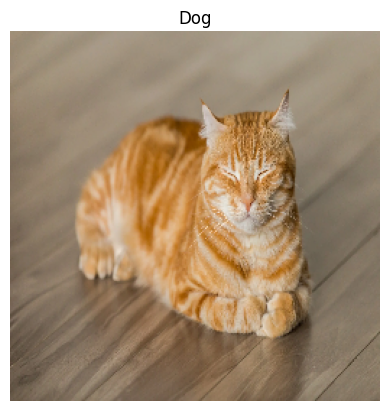

In [17]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
plt.title("Dog" if prediction[0][0] > 0.5 else "Cat")
plt.show()


In [18]:
import tensorflow as tf
import numpy as np

img_path = "/content/dog.jpg"   # change this

img = tf.keras.preprocessing.image.load_img(
    img_path,
    target_size=(256, 256)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0   # only if you normalized during training

img_array = np.expand_dims(img_array, axis=0)


In [19]:
prediction = model.predict(img_array)

print("Prediction probability:", prediction[0][0])

if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction probability: 0.9999653
Predicted: Dog


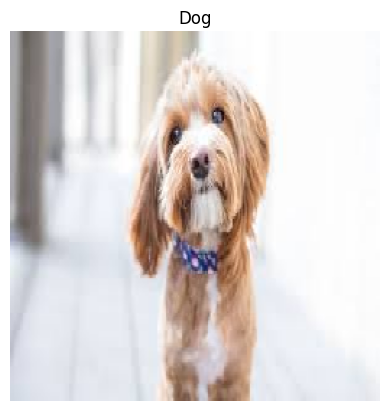

In [20]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
plt.title("Dog" if prediction[0][0] > 0.5 else "Cat")
plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

base_model = tf.keras.applications.EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(256, 256, 3)
)

base_model.trainable = False

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [23]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)


Epoch 1/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 102s 101ms/step - accuracy: 0.4985 - loss: 0.7260 - val_accuracy: 0.4968 - val_loss: 0.6935
Epoch 2/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.5010 - loss: 0.7093 - val_accuracy: 0.4968 - val_loss: 0.6935
Epoch 3/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.5073 - loss: 0.7035 - val_accuracy: 0.5032 - val_loss: 0.6933
Epoch 4/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.5095 - loss: 0.7036 - val_accuracy: 0.5032 - val_loss: 0.6937
Epoch 5/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.4972 - loss: 0.7026 - val_accuracy: 0.4968 - val_loss: 0.6932
Epoch 6/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.5051 - loss: 0.6995 - val_accuracy: 0.4968 - val_loss: 0.6933
Epoch 7/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.4995 - loss: 0.7006 - val_accuracy: 0.5032 - val_loss: 0.6931
Epoch 8/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.4884 - loss: 0.7000 

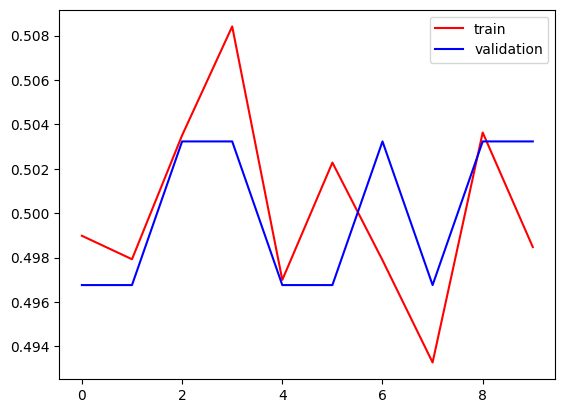

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

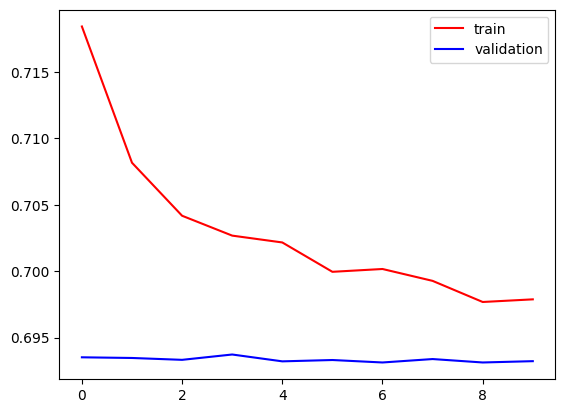

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models

base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(256, 256, 3)
)

base_model.trainable = False

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [30]:
model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)


Epoch 1/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 112s 132ms/step - accuracy: 0.5654 - loss: 0.6880 - val_accuracy: 0.5094 - val_loss: 0.6850
Epoch 2/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 85s 115ms/step - accuracy: 0.5779 - loss: 0.6731 - val_accuracy: 0.5928 - val_loss: 0.6652
Epoch 3/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 85s 115ms/step - accuracy: 0.5882 - loss: 0.6663 - val_accuracy: 0.5964 - val_loss: 0.6613
Epoch 4/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 85s 114ms/step - accuracy: 0.5983 - loss: 0.6616 - val_accuracy: 0.5995 - val_loss: 0.6581
Epoch 5/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 151s 127ms/step - accuracy: 0.6010 - loss: 0.6593 - val_accuracy: 0.6089 - val_loss: 0.6528
Epoch 6/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 85s 115ms/step - accuracy: 0.6060 - loss: 0.6556 - val_accuracy: 0.6161 - val_loss: 0.6485
Epoch 7/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 93s 126ms/step - accuracy: 0.6140 - loss: 0.6515 - val_accuracy: 0.6210 - val_loss: 0.6481
Epoch 8/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 85s 115ms/step - accuracy: 0.6125 - loss:

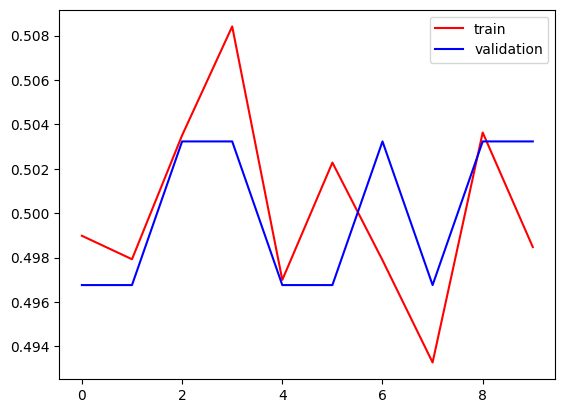

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

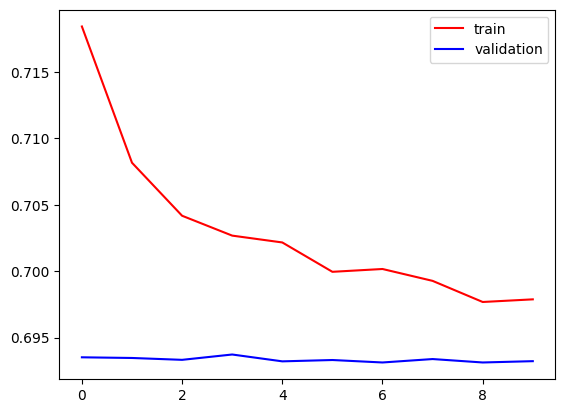

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()